# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sofyan Egi Lesmana
- **Email:** sofyanegi.dicoding@gmail.com
- **ID Dicoding:** sofyanegi

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan pengguna bike sharing dari tahun 2011-2012?
- Bagaimana perbandingan antara pengguna casual dan registered dari total pengguna bike sharing?
- Bagaimana perbandingan penggunaan bike sharing pada hari libur dan hari kerja?
- Bagaimana perbandingan penggunaan bike sharing berdasarkan keadaan cuaca?
- Bagaimana perbandingan penggunaan bike sharing berdasarkan keadaan musim?
- Pada pukul berapa penggunaan bike sharing terbanyak dan terendah?

## Import Semua Packages/Library yang Digunakan

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

Ditahap ini merupakan proses pengumpulan data yang menjadi bahan untuk proses analisis data dalam kasus Bike Sharing. Terdapat 2 dataset yaitu **day.csv** dan **hour.csv**.

##### **Load Table Day**

In [102]:
day_df = pd.read_csv("https://raw.githubusercontent.com/sofyanegil/bike-sharing-analyst/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### **Load Table Hour**

In [103]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/sofyanegil/bike-sharing-analyst/main/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Ditahap ini merupakan proses mengidentifikasi variabel relevan untuk analisis lebih lanjut terkait penilaian meliputi mengecek tipe data, missing value, duplicate value, dan inacurate value data

#### Menilai tabel `day_df`

##### Mengecek tipe data

In [104]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Mengecek missing value

In [105]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Mengecek duplicate data

In [106]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Mengecek inacurate value data

In [107]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Result tabel `day_df`


*   Tidak terdapat missing value, duplicate data, dan inacurate value dari tabel day_df.
*   Beberapa kolom bisa didrop saat cleaning, kolom tersebut diantaranya: temp, atemp, hum, dan windspeed. Alasannya, karena sulit dikategorikan dan tidak diperlukan untuk menjawab pertanyaan analisis.
*   Beberapa kolom sulit dibaca maknanya, sehingga perlu direname. Kolom tersebut antara lain instant = record_id, dtday = dateday, yr = year, mnth = month, weathersit = weather_situation, cnt = total.
*   Kolom seperti season, year, month, holiday, weekday, workingday, dan weather_situation bisa diubah tipe datanya menjadi kategori dan valuenya disesuaikan.
*   Kolom dateday masih bertipe data object, ubah menjadi datetime

#### Menilai tabel `hour_df`

##### Mengecek tipe data

In [108]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Mengecek missing value

In [109]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Mengecek duplicate data

In [110]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Mengecek inacurate value data

In [111]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Result tabel `hour_df`


*   Tidak terdapat missing value, duplicate data, dan inacurate value dari tabel hour_df.
*   Beberapa kolom bisa didrop saat cleaning, kolom tersebut diantaranya: temp, atemp, hum, dan windspeed. Alasannya, karena sulit dikategorikan dan tidak diperlukan untuk menjawab pertanyaan analisis.
*   Beberapa kolom sulit dibaca maknanya, sehingga perlu direname. Kolom tersebut antara lain instant = record_id, dtday = dateday, yr = year, mnth = month, hr = hour, weathersit = weather_situation, cnt = total.
*   Kolom seperti season, year, month, hour, holiday, weekday, workingday, dan weather_situation bisa diubah tipe datanya menjadi kategori dan valuenya disesuaikan.
*   Kolom dateday masih bertipe data object, ubah menjadi datetime

### Cleaning Data

#### Cleaning tabel `day_df`

Drop kolom yang tidak diperlukan

In [112]:
day_df.drop(columns=['temp', 'atemp', 'hum', 'windspeed'], inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


Rename kolom yang sulit dibaca maknanya

In [113]:
day_df.rename(
    columns={
        'instant':'record_id',
        'dteday':'dateday',
        'yr':'year',
        'mnth':'month',
        'weathersit':'weather_situation',
        'cnt':'total'
    }, inplace=True)
day_df.head()

,record_id,dateday,season,year,month,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


Ubah tipe data beberapa kolom menjadi kategori dan kolom dateday menjadi datetime

In [114]:
categorical_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_situation']

for col in categorical_columns:
    day_df[col] = pd.Categorical(day_df[col])

day_df['dateday'] = pd.to_datetime(day_df['dateday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   record_id          731 non-null    int64         
 1   dateday            731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_situation  731 non-null    category      
 9   casual             731 non-null    int64         
 10  registered         731 non-null    int64         
 11  total              731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(4)
memory usage: 35.1 KB


Sesuaikan value kolom season, year, month, holiday, weekday, workingday, dan weather_situation menjadi beberapa kategori

In [115]:
season_mapping = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
day_df['season'] = day_df['season'].map(season_mapping)

day_df.head()

,record_id,dateday,season,year,month,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,82,1518,1600


In [116]:
year_mapping = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(year_mapping)

day_df.head()

,record_id,dateday,season,year,month,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,1,0,6,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,1,82,1518,1600


In [117]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
day_df['month'] = day_df['month'].map(month_mapping)

day_df.head()

,record_id,dateday,season,year,month,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,0,6,0,2,331,654,985
1,2,2011-01-02,springer,2011,January,0,0,0,2,131,670,801
2,3,2011-01-03,springer,2011,January,0,1,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,2,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,3,1,1,82,1518,1600


In [118]:
holiday_mapping = {0: 'Not Holiday', 1: 'Holiday'}
day_df['holiday'] = day_df['holiday'].map(holiday_mapping)

day_df.head()

,record_id,dateday,season,year,month,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,Not Holiday,6,0,2,331,654,985
1,2,2011-01-02,springer,2011,January,Not Holiday,0,0,2,131,670,801
2,3,2011-01-03,springer,2011,January,Not Holiday,1,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,January,Not Holiday,2,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,January,Not Holiday,3,1,1,82,1518,1600


In [119]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

day_df.head()

,record_id,dateday,season,year,month,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,Not Holiday,Saturday,0,2,331,654,985
1,2,2011-01-02,springer,2011,January,Not Holiday,Sunday,0,2,131,670,801
2,3,2011-01-03,springer,2011,January,Not Holiday,Monday,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,January,Not Holiday,Tuesday,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,January,Not Holiday,Wednesday,1,1,82,1518,1600


In [120]:
workingday_map = {0: 'Weekend', 1: 'Working Day'}
day_df['workingday'] = day_df['workingday'].map(workingday_map)

day_df.head()

,record_id,dateday,season,year,month,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,Not Holiday,Saturday,Weekend,2,331,654,985
1,2,2011-01-02,springer,2011,January,Not Holiday,Sunday,Weekend,2,131,670,801
2,3,2011-01-03,springer,2011,January,Not Holiday,Monday,Working Day,1,120,1229,1349
3,4,2011-01-04,springer,2011,January,Not Holiday,Tuesday,Working Day,1,108,1454,1562
4,5,2011-01-05,springer,2011,January,Not Holiday,Wednesday,Working Day,1,82,1518,1600


In [121]:
weather_mapping = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Thunderstorm'
}
day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)

day_df.head()

,record_id,dateday,season,year,month,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,Not Holiday,Saturday,Weekend,Mist + Cloudy,331,654,985
1,2,2011-01-02,springer,2011,January,Not Holiday,Sunday,Weekend,Mist + Cloudy,131,670,801
2,3,2011-01-03,springer,2011,January,Not Holiday,Monday,Working Day,Clear,120,1229,1349
3,4,2011-01-04,springer,2011,January,Not Holiday,Tuesday,Working Day,Clear,108,1454,1562
4,5,2011-01-05,springer,2011,January,Not Holiday,Wednesday,Working Day,Clear,82,1518,1600


#### Cleaning tabel `hour_df`

Drop kolom yang tidak diperlukan

In [122]:
hour_df.drop(columns=['temp', 'atemp', 'hum', 'windspeed'], inplace=True)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


Rename kolom yang sulit dibaca maknanya

In [123]:
hour_df.rename(
    columns={
        'instant':'record_id',
        'dteday':'dateday',
        'yr':'year',
        'mnth':'month',
        'hr':'hour',
        'weathersit':'weather_situation',
        'cnt':'total'
    }, inplace=True)
hour_df.head()

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


Ubah tipe data beberapa kolom menjadi kategori dan kolom dateday menjadi datetime

In [124]:
cate_columns = ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather_situation']

for col in cate_columns:
    hour_df[col] = pd.Categorical(hour_df[col])

hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   record_id          17379 non-null  int64         
 1   dateday            17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   holiday            17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   workingday         17379 non-null  category      
 9   weather_situation  17379 non-null  category      
 10  casual             17379 non-null  int64         
 11  registered         17379 non-null  int64         
 12  total              17379 non-null  int64         
dtypes: category(8), datetime64[ns](1), int64(4)
memory usage: 817

Sesuaikan value kolom season, year, month, hour, holiday, weekday, workingday, dan weather_situation menjadi beberapa kategori

In [125]:
season_mapping = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)

hour_df.head()

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,1,0,1,1


In [126]:
year_mapping = {0: 2011, 1: 2012}
hour_df['year'] = hour_df['year'].map(year_mapping)

hour_df.head()

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,6,0,1,0,1,1


In [127]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
hour_df['month'] = hour_df['month'].map(month_mapping)

hour_df.head()

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,0,0,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,January,1,0,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,January,2,0,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,January,3,0,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,January,4,0,6,0,1,0,1,1


In [128]:
hour_mapping = {
    0: '12 AM',
    1: '1 AM',
    2: '2 AM',
    3: '3 AM',
    4: '4 AM',
    5: '5 AM',
    6: '6 AM',
    7: '7 AM',
    8: '8 AM',
    9: '9 AM',
    10: '10 AM',
    11: '11 AM',
    12: '12 PM',
    13: '1 PM',
    14: '2 PM',
    15: '3 PM',
    16: '4 PM',
    17: '5 PM',
    18: '6 PM',
    19: '7 PM',
    20: '8 PM',
    21: '9 PM',
    22: '10 PM',
    23: '11 PM'
}

hour_df['hour'] = hour_df['hour'].map(hour_mapping)

hour_df.head()

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,12 AM,0,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,January,1 AM,0,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,January,2 AM,0,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,January,3 AM,0,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,January,4 AM,0,6,0,1,0,1,1


In [129]:
holiday_mapping = {0: 'Not Holiday', 1: 'Holiday'}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)

hour_df.head()

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,12 AM,Not Holiday,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,January,1 AM,Not Holiday,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,January,2 AM,Not Holiday,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,January,3 AM,Not Holiday,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,January,4 AM,Not Holiday,6,0,1,0,1,1


In [130]:
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

hour_df.head()

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,12 AM,Not Holiday,Saturday,0,1,3,13,16
1,2,2011-01-01,springer,2011,January,1 AM,Not Holiday,Saturday,0,1,8,32,40
2,3,2011-01-01,springer,2011,January,2 AM,Not Holiday,Saturday,0,1,5,27,32
3,4,2011-01-01,springer,2011,January,3 AM,Not Holiday,Saturday,0,1,3,10,13
4,5,2011-01-01,springer,2011,January,4 AM,Not Holiday,Saturday,0,1,0,1,1


In [131]:
workingday_mapping = {0: 'Weekend', 1: 'Working Day'}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)

hour_df.head()

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,12 AM,Not Holiday,Saturday,Weekend,1,3,13,16
1,2,2011-01-01,springer,2011,January,1 AM,Not Holiday,Saturday,Weekend,1,8,32,40
2,3,2011-01-01,springer,2011,January,2 AM,Not Holiday,Saturday,Weekend,1,5,27,32
3,4,2011-01-01,springer,2011,January,3 AM,Not Holiday,Saturday,Weekend,1,3,10,13
4,5,2011-01-01,springer,2011,January,4 AM,Not Holiday,Saturday,Weekend,1,0,1,1


In [132]:
weather_mapping = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Thunderstorm'
}

hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)

hour_df.head()

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
0,1,2011-01-01,springer,2011,January,12 AM,Not Holiday,Saturday,Weekend,Clear,3,13,16
1,2,2011-01-01,springer,2011,January,1 AM,Not Holiday,Saturday,Weekend,Clear,8,32,40
2,3,2011-01-01,springer,2011,January,2 AM,Not Holiday,Saturday,Weekend,Clear,5,27,32
3,4,2011-01-01,springer,2011,January,3 AM,Not Holiday,Saturday,Weekend,Clear,3,10,13
4,5,2011-01-01,springer,2011,January,4 AM,Not Holiday,Saturday,Weekend,Clear,0,1,1


## Exploratory Data Analysis (EDA)

Data pada hour_df lebih lengkap, sehingga akan dilakukan explorasi untuk menjawab pertanyaan bisnis.

### Explore `hour_df`

In [133]:
hour_df.sample(5)

,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
11041,11042,2012-04-10,summer,2012,April,5 AM,Not Holiday,Tuesday,Working Day,Clear,0,24,24
17366,17367,2012-12-31,springer,2012,December,11 AM,Not Holiday,Monday,Working Day,Mist + Cloudy,43,114,157
4079,4080,2011-06-23,fall,2011,June,9 PM,Not Holiday,Thursday,Working Day,Clear,46,188,234
12150,12151,2012-05-26,summer,2012,May,11 AM,Not Holiday,Saturday,Weekend,Clear,208,312,520
8821,8822,2012-01-08,springer,2012,January,9 AM,Not Holiday,Sunday,Weekend,Clear,23,102,125


In [134]:
hour_df.describe(include='all')

<ipython-input-134-8c27de8cc91c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,record_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,casual,registered,total
count,17379.0000,17379,17379,17379.0,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2.0,12,24,2,7,2,4,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,2012.0,May,5 PM,Not Holiday,Saturday,Working Day,Clear,NaN,NaN,NaN
freq,NaN,24,4496,8734.0,1488,730,16879,2512,11865,11413,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,34.000000,40.000000


**Compare pengguna berdasarkan season**

In [135]:
season_hour_df = hour_df.groupby(by='season').agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

season_hour_df

,registered,casual,total
season,,,
fall,835038,226091,1061129
summer,715067,203522,918589
winter,711831,129782,841613
springer,410726,60622,471348


**Compare pengguna berdasarkan year**

In [136]:
year_hour_df = hour_df.groupby(by='year').agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='year', ascending=True)

year_hour_df

,registered,casual,total
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


**Compare pengguna berdasarkan month**

In [137]:
month_hour_df = hour_df.groupby(by='month').agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

month_hour_df

,registered,casual,total
month,,,
August,279155,72039,351194
June,272436,73906,346342
September,275668,70323,345991
July,266791,78157,344948
May,256401,75285,331686
October,262592,59760,322352
April,208292,60802,269094
November,218228,36603,254831
March,184476,44444,228920


**Compare pengguna berdasarkan hour**

In [138]:
hours_hour_df = hour_df.groupby(by='hour').agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

hours_hour_df

,registered,casual,total
hour,,,
5 PM,282640,54220,336860
6 PM,265276,44496,309772
8 AM,245240,15761,261001
4 PM,173914,53834,227748
7 PM,191284,35505,226789
1 PM,132206,52713,184919
12 PM,134696,49718,184414
3 PM,128543,54606,183149
2 PM,120563,55089,175652


**Compare pengguna berdasarkan holiday**

In [139]:
holiday_hour_df = hour_df.groupby(by='holiday').agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

holiday_hour_df

,registered,casual,total
holiday,,,
Not Holiday,2616586,597658,3214244
Holiday,56076,22359,78435


**Compare pengguna berdasarkan weekday**

In [140]:
weekday_hour_df = hour_df.groupby(by='weekday').agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

weekday_hour_df

,registered,casual,total
weekday,,,
Friday,409552,78238,487790
Thursday,423935,61460,485395
Saturday,323955,153852,477807
Wednesday,415729,57319,473048
Tuesday,411266,57843,469109
Monday,384719,70784,455503
Sunday,303506,140521,444027


**Compare pengguna berdasarkan workingday**

In [141]:
workingday_hour_df = hour_df.groupby(by='workingday').agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

workingday_hour_df

,registered,casual,total
workingday,,,
Working Day,1989125,303285,2292410
Weekend,683537,316732,1000269


**Compare pengguna berdasarkan weather_situation**

In [142]:
weather_situation_hour_df = hour_df.groupby(by='weather_situation').agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

weather_situation_hour_df

,registered,casual,total
weather_situation,,,
Clear,1875428,462745,2338173
Mist + Cloudy,661471,134481,795952
Light Snow/Rain,135548,22783,158331
Heavy Rain/Thunderstorm,215,8,223


Result


*   Bike sharing paling banyak digunakan pada musim fall, diikuti oleh summer, winter, dan springer dengan jumlah pengguna terendah.
*   Jumlah pengguna bike sharing tertinggi tercatat pada tahun 2012, mengalami peningkatan lebih dari 50% dibandingkan tahun 2011.
*   Bulan dengan penggunaan bike sharing tertinggi adalah Agustus, sementara Januari memiliki penggunaan terendah.
*   Jam puncak penggunaan bike sharing terjadi pada pukul 17.00 dan paling rendah pada pukul 04.00.
*   Penggunaan bike sharing lebih tinggi pada hari bukan libur dibandingkan pada hari libur.
*   Jumat menjadi hari dengan penggunaan bike sharing paling tinggi, sedangkan Minggu memiliki penggunaan terendah.
*   Bike sharing lebih sering digunakan pada hari kerja dibandingkan akhir pekan.
*   Penggunaan bike sharing terbanyak terkait kondisi cuaca adalah pada cuaca cerah, diikuti oleh kabut + awan, hujan ringan/salju, dan hujan lebat/angin kencang dengan penggunaan terendah.

















## Visualization & Explanatory Analysis

### Bagaimana perkembangan pengguna bike sharing dari tahun 2011-2012?

In [143]:
year_hour_df

,registered,casual,total
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


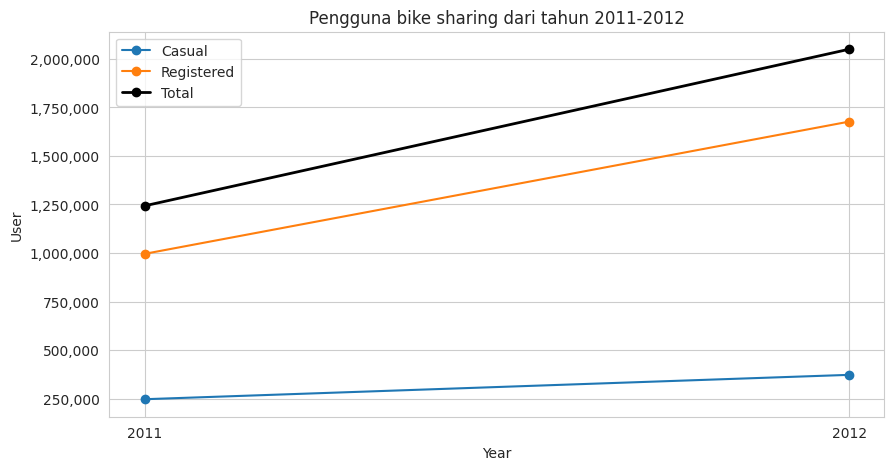

In [144]:
plt.figure(figsize=(10, 5))
plt.plot(year_hour_df.index, year_hour_df['casual'], label='Casual', marker='o')
plt.plot(year_hour_df.index, year_hour_df['registered'], label='Registered', marker='o')
plt.plot(year_hour_df.index, year_hour_df['total'], label='Total', marker='o', linewidth=2, color='black')
plt.xticks(year_hour_df.index, ['2011', '2012'])
plt.xlabel('Year')
plt.ylabel('User')
plt.title('Pengguna bike sharing dari tahun 2011-2012')
plt.grid(True)
plt.gca().yaxis.set_major_formatter('{x:,.0f}')
plt.legend()
plt.show()

### Bagaimana perbandingan antara pengguna casual dan registered dari total pengguna bike sharing?

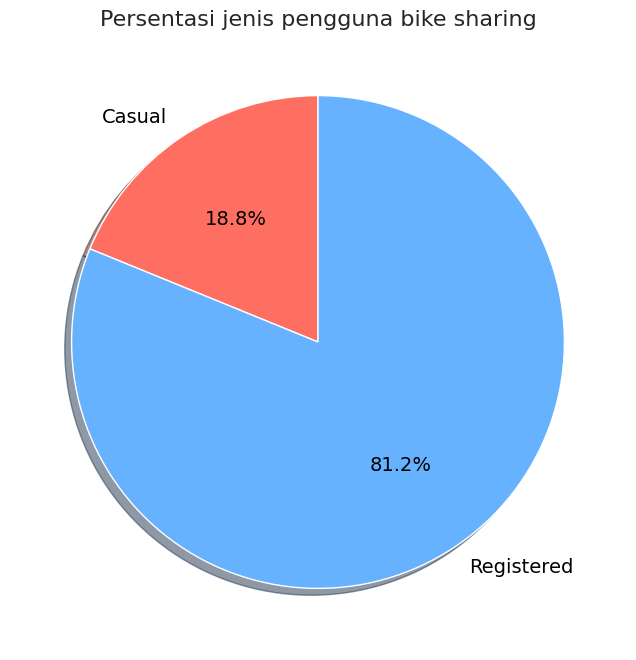

In [145]:
user_total = hour_df[['casual', 'registered']].sum()
colors = ['#FF6F61', '#66B2FF']
plt.figure(figsize=(8, 8))
plt.pie(
    x=user_total,
    labels=('Casual', 'Registered'),
    colors=colors,
    autopct='%1.1f%%',
    textprops={'fontsize': 14, 'color': 'black'},
    startangle=90,
    shadow=True,
)
plt.title('Persentasi jenis pengguna bike sharing', fontsize=16)
plt.show()

### Bagaimana perbandingan penggunaan bike sharing pada hari libur dan hari kerja?

In [146]:
workingday_hour_df

,registered,casual,total
workingday,,,
Working Day,1989125,303285,2292410
Weekend,683537,316732,1000269


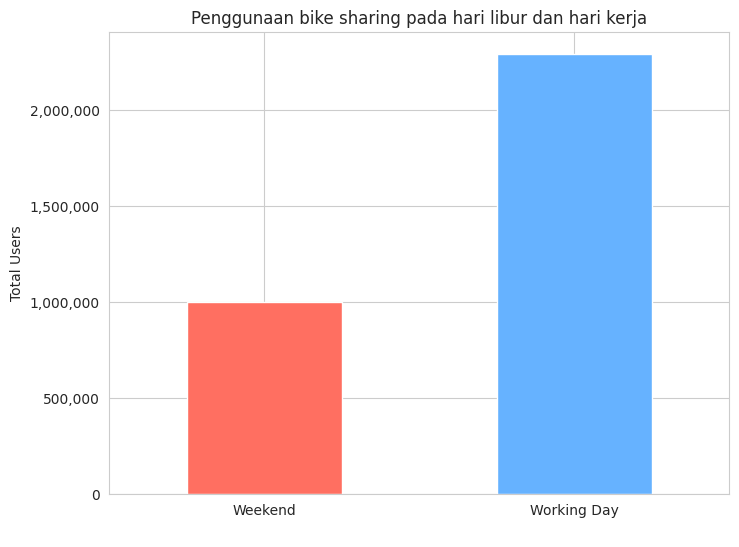

In [147]:
workingday_data = workingday_hour_df.groupby('workingday')['total'].sum()
colors = ['#FF6F61', '#66B2FF']
plt.figure(figsize=(8, 6))
workingday_data.plot(kind='bar', color=colors)
plt.xlabel(' ')
plt.ylabel('Total Users')
plt.title('Penggunaan bike sharing pada hari libur dan hari kerja')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')
plt.xticks(rotation=0)
plt.show()

### Bagaimana perbandingan penggunaan bike sharing berdasarkan keadaan cuaca?

In [148]:
weather_situation_hour_df

,registered,casual,total
weather_situation,,,
Clear,1875428,462745,2338173
Mist + Cloudy,661471,134481,795952
Light Snow/Rain,135548,22783,158331
Heavy Rain/Thunderstorm,215,8,223


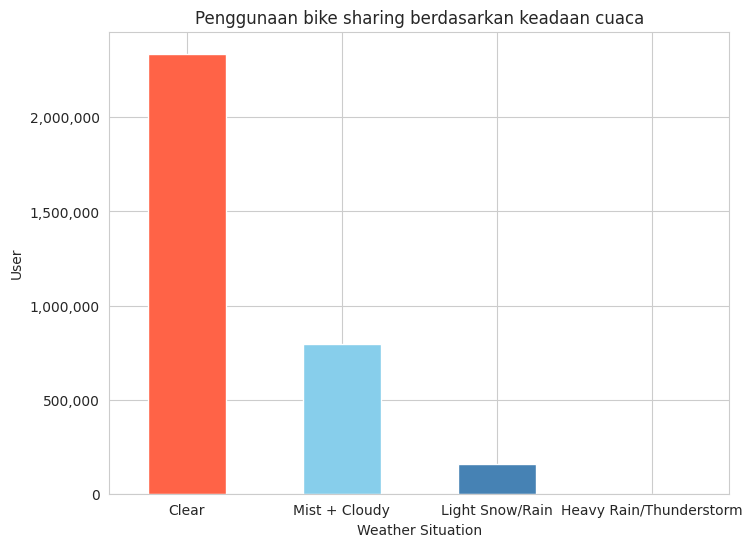

In [149]:
weather_data = weather_situation_hour_df.groupby('weather_situation')['total'].sum()
colors = ['#FF6347', '#87CEEB', '#4682B4', '#32CD32']
plt.figure(figsize=(8, 6))
weather_data.plot(kind='bar', color=colors)
plt.xlabel('Weather Situation')
plt.ylabel('User')
plt.title('Penggunaan bike sharing berdasarkan keadaan cuaca')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')
plt.xticks(rotation=0)
plt.show()

### Bagaimana perbandingan penggunaan bike sharing berdasarkan keadaan musim?

In [150]:
season_hour_df

,registered,casual,total
season,,,
fall,835038,226091,1061129
summer,715067,203522,918589
winter,711831,129782,841613
springer,410726,60622,471348


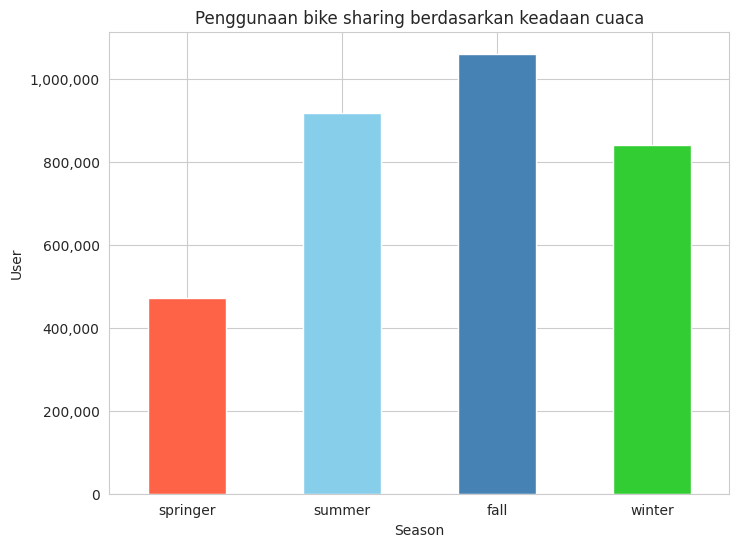

In [151]:
season_data = season_hour_df.groupby('season')['total'].sum()
colors = ['#FF6347', '#87CEEB', '#4682B4', '#32CD32']
plt.figure(figsize=(8, 6))
season_data.plot(kind='bar', color=colors)
plt.xlabel('Season')
plt.ylabel('User')
plt.title('Penggunaan bike sharing berdasarkan keadaan cuaca')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')
plt.xticks(rotation=0)
plt.show()

### Pada pukul berapa penggunaan bike sharing terbanyak dan terendah?

In [152]:
hours_hour_df.sort_values(by='total')

,registered,casual,total
hour,,,
4 AM,3554,874,4428
3 AM,6281,1893,8174
5 AM,13249,1012,14261
2 AM,12940,3412,16352
1 AM,19455,4709,24164
12 AM,31755,7375,39130
6 AM,52115,3017,55132
11 PM,52876,11065,63941
10 PM,79412,16200,95612


<ipython-input-153-28b14222cfc8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hours_hour_df, x='total', y='hour', palette=colors, orient='h')
<ipython-input-153-28b14222cfc8>:5: UserWarning: 
The palette list has fewer values (1) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=hours_hour_df, x='total', y='hour', palette=colors, orient='h')


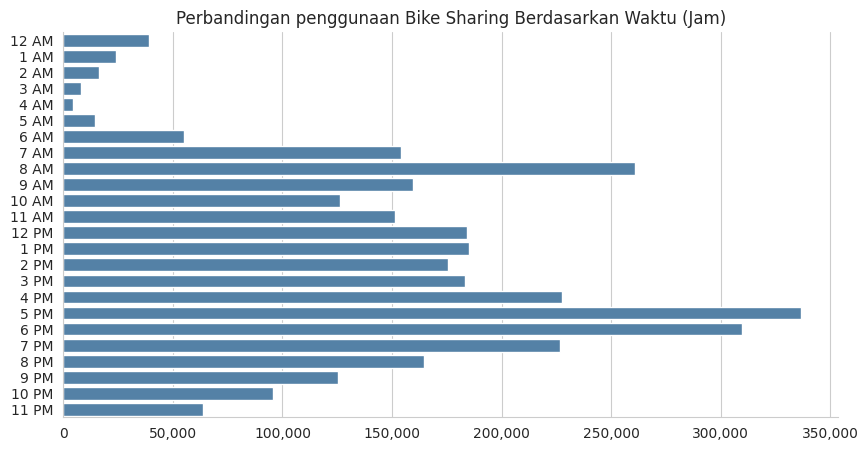

In [153]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.set_style('whitegrid')
colors = ['#4682B4']
sns.barplot(data=hours_hour_df, x='total', y='hour', palette=colors, orient='h')
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.title('Perbandingan penggunaan Bike Sharing Berdasarkan Waktu (Jam)')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Conclusion

- Terdapat peningkatan > 50% total pengguna bike sharing di tahun 2012 dibanding 2011
- Perbandingan jenis pengguna bike sharing dari 2011 - 2012 adalah 81.2% pengguna registered dan 18.2% pengguna casual.
- Pengguna bike sharing lebih banyak pada hari kerja dibandingkan hari libur
- Penggunaan bike sharing terbanyak terkait kondisi cuaca adalah pada cuaca cerah, diikuti oleh kabut + awan, hujan ringan/salju, dan hujan lebat/angin kencang dengan penggunaan terendah.
- Bike sharing paling banyak digunakan pada musim fall, diikuti oleh summer, winter, dan springer dengan jumlah pengguna terendah.
- Jam puncak penggunaan bike sharing terjadi pada pukul 5 PM dan paling rendah pada pukul 4 AM.